# Hypothesis: 
## I think that the majority of the first year students in this class have a primary major of computer science!

Before starting, I will ensure that the data is autoreloded if any changes are made. 

In [1]:
%reload_ext autoreload
%autoreload 2

## Reading and Selcting Data 
I will start by reading the CSV data. 

In [2]:
from data_utils import read_csv_rows

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')


Now I will select all of the rows that correspond to first-year students.

In [3]:
from data_utils import row_filter

first_years: list[dict[str, str]] = row_filter(data_rows, "Incoming First-year Student")


I will now use the `columnar` funtion to convert the rows previously selected to column based data.  

In [4]:
from data_utils import columnar

columns: dict[str, list[str]] = columnar(first_years)


I will now select only the `unc_status` and `primary_major` columns. 
Displayed are the first 10 rows using the tabulate function.

In [5]:
from data_utils import select, head 
from tabulate import tabulate

selected_data: dict[str, list[str]] = select(columns, "primary_major")

tabulate(head(selected_data, 10), selected_data.keys() , "html")

primary_major
Biostatistics
Biostatistics
Biostatistics
Business
Business
Business
Business
Computer Science
Computer Science
Computer Science


## Counting Up Totals 
I will now total up how many of each major are in the class.

In [6]:
from data_utils import count

counts: dict[str, int] = count(selected_data["primary_major"])
counts

{'Biostatistics': 2,
 'Biostatistics ': 1,
 'Business': 4,
 'Computer Science': 67,
 'Economics': 3,
 'Information Science': 2,
 'Math ': 2,
 'Neuroscience': 1,
 'Neuroscience ': 1,
 'Physics': 1,
 'Psychology': 2,
 'Public Health': 2,
 'Statistics': 1,
 'Statistics ': 1,
 'Undecided': 1}

NOTE: The reason that there seems to be duplicate keys in the above is due to some peoples responses containing a space after their major and some not. In order to fix this for the visual I will manually correct the counts. 

In [7]:
counts["Biostatistics"] = 3
counts.pop("Biostatistics ")
counts["Neuroscience"] = 2
counts.pop("Neuroscience ")
counts["Statistics"] = 2
counts.pop("Statistics ")
counts

{'Biostatistics': 3,
 'Business': 4,
 'Computer Science': 67,
 'Economics': 3,
 'Information Science': 2,
 'Math ': 2,
 'Neuroscience': 2,
 'Physics': 1,
 'Psychology': 2,
 'Public Health': 2,
 'Statistics': 2,
 'Undecided': 1}

Before making the plot we must first turn the counts into parameters that seaborn barplots can read.

In [8]:

majors: list[str] = []
vals: list[int] = []
for x in counts:
    majors.append(x)
    vals.append(counts[x])
result: dict[list[str]] = {"Primary Major":[], "Number of 1st Year Students": []}
result["Primary Major"] = majors
result["Number of 1st Year Students"] = vals

## Plotting Data 
Now that we have all the data cleaned up due to unforseen human errors I will creat a plot of this data for easier visualization. 

<AxesSubplot:>

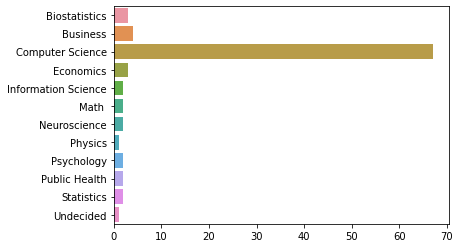

In [9]:

import seaborn
seaborn.barplot(x="Number of 1st Year Students", y="Primary Major", data=result)


# Conclusion
As hypothesized, the majority of first-year students in this class ARE majoring in computer science! We can see this throught the counts, however plotting the data in a bar graph makes the results glaringly obvious. This is likely becuase computer science majors will start their undergrad career with this class. Non-Comp Sci majors, on the other hand, are less likely to start with COMP 110 their first semester. 